### О задании

Задание состоит из последовательных вопросов (отвечать на них обязательно, код и графики без интерпретации не имеют никакого смысла, иначе - снижение баллов), посвященных работе с табличными данными, но на более низком уровне с помощью Numpy

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

***DeadLine - 08.11.2024 23:59***


## Инструкция по сдаче ДЗ.



0. Просмотр лекции обязателен. Не потому что без этого невозможно выполнить домашнее задание, а потому что с этим выполнение домашнего задания станет комфортным, приятным и быстрым. Вы потратите намного меньше времени для изучения материала и понимания того, что от Вас хотят, нежели сразу приступите к выполнению домашнего задания без просмотра лекции.

1. Скопируйте к себе колаб-ноутбук.

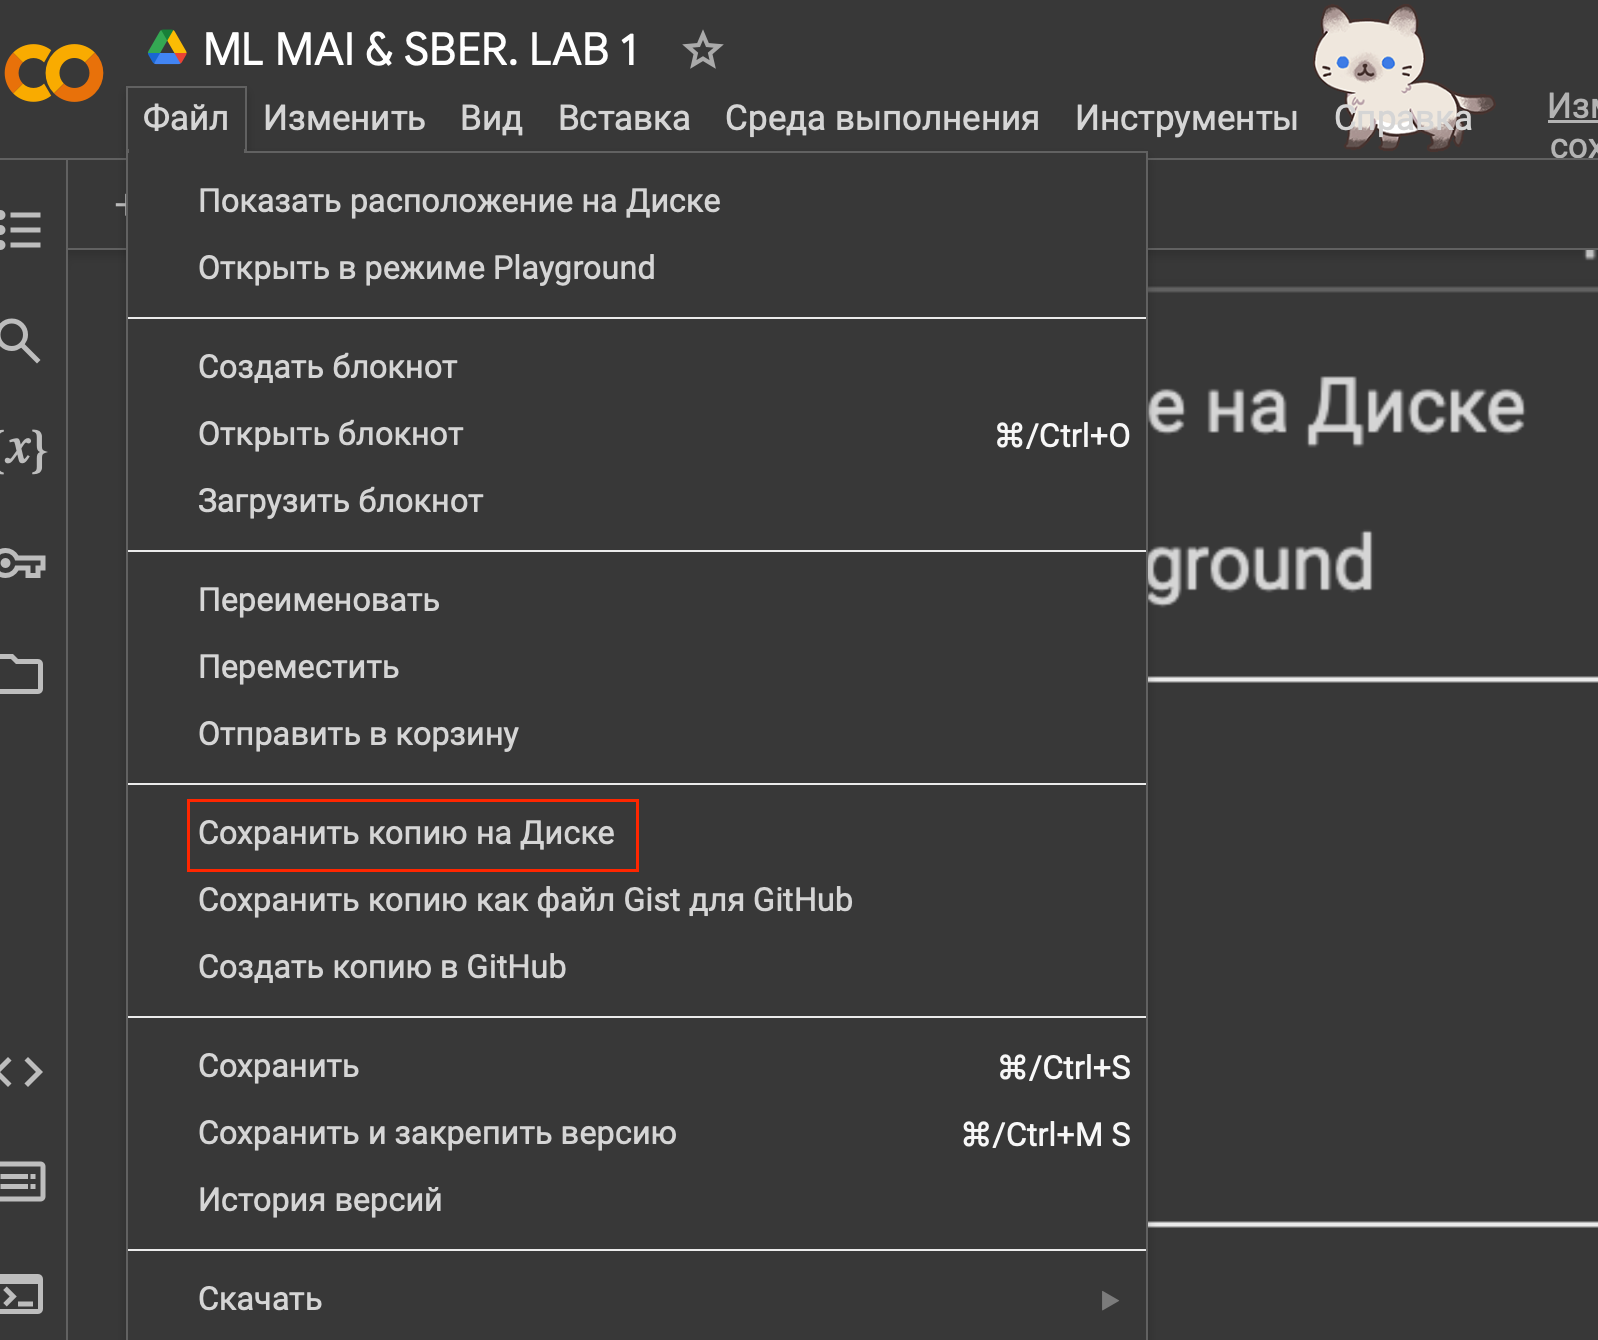

2. у Вас откроется файл в новой вкладке с названием "Копия...". После описания задания вы пишите решение этого задания.

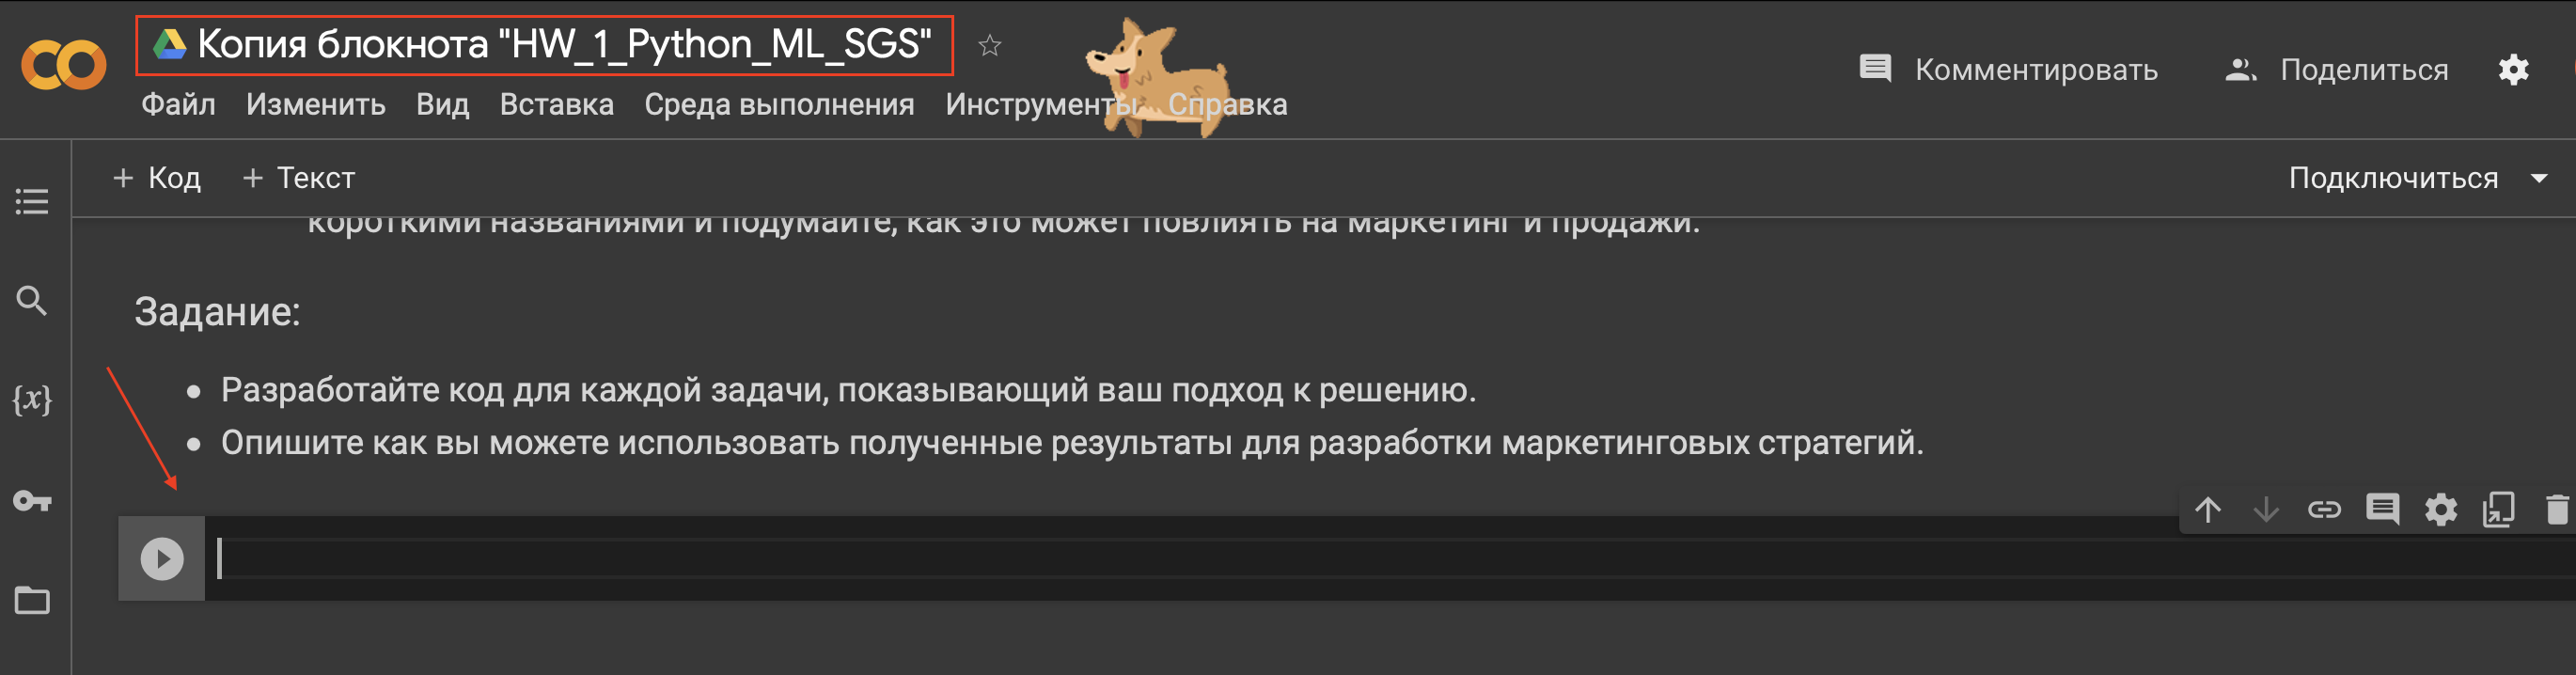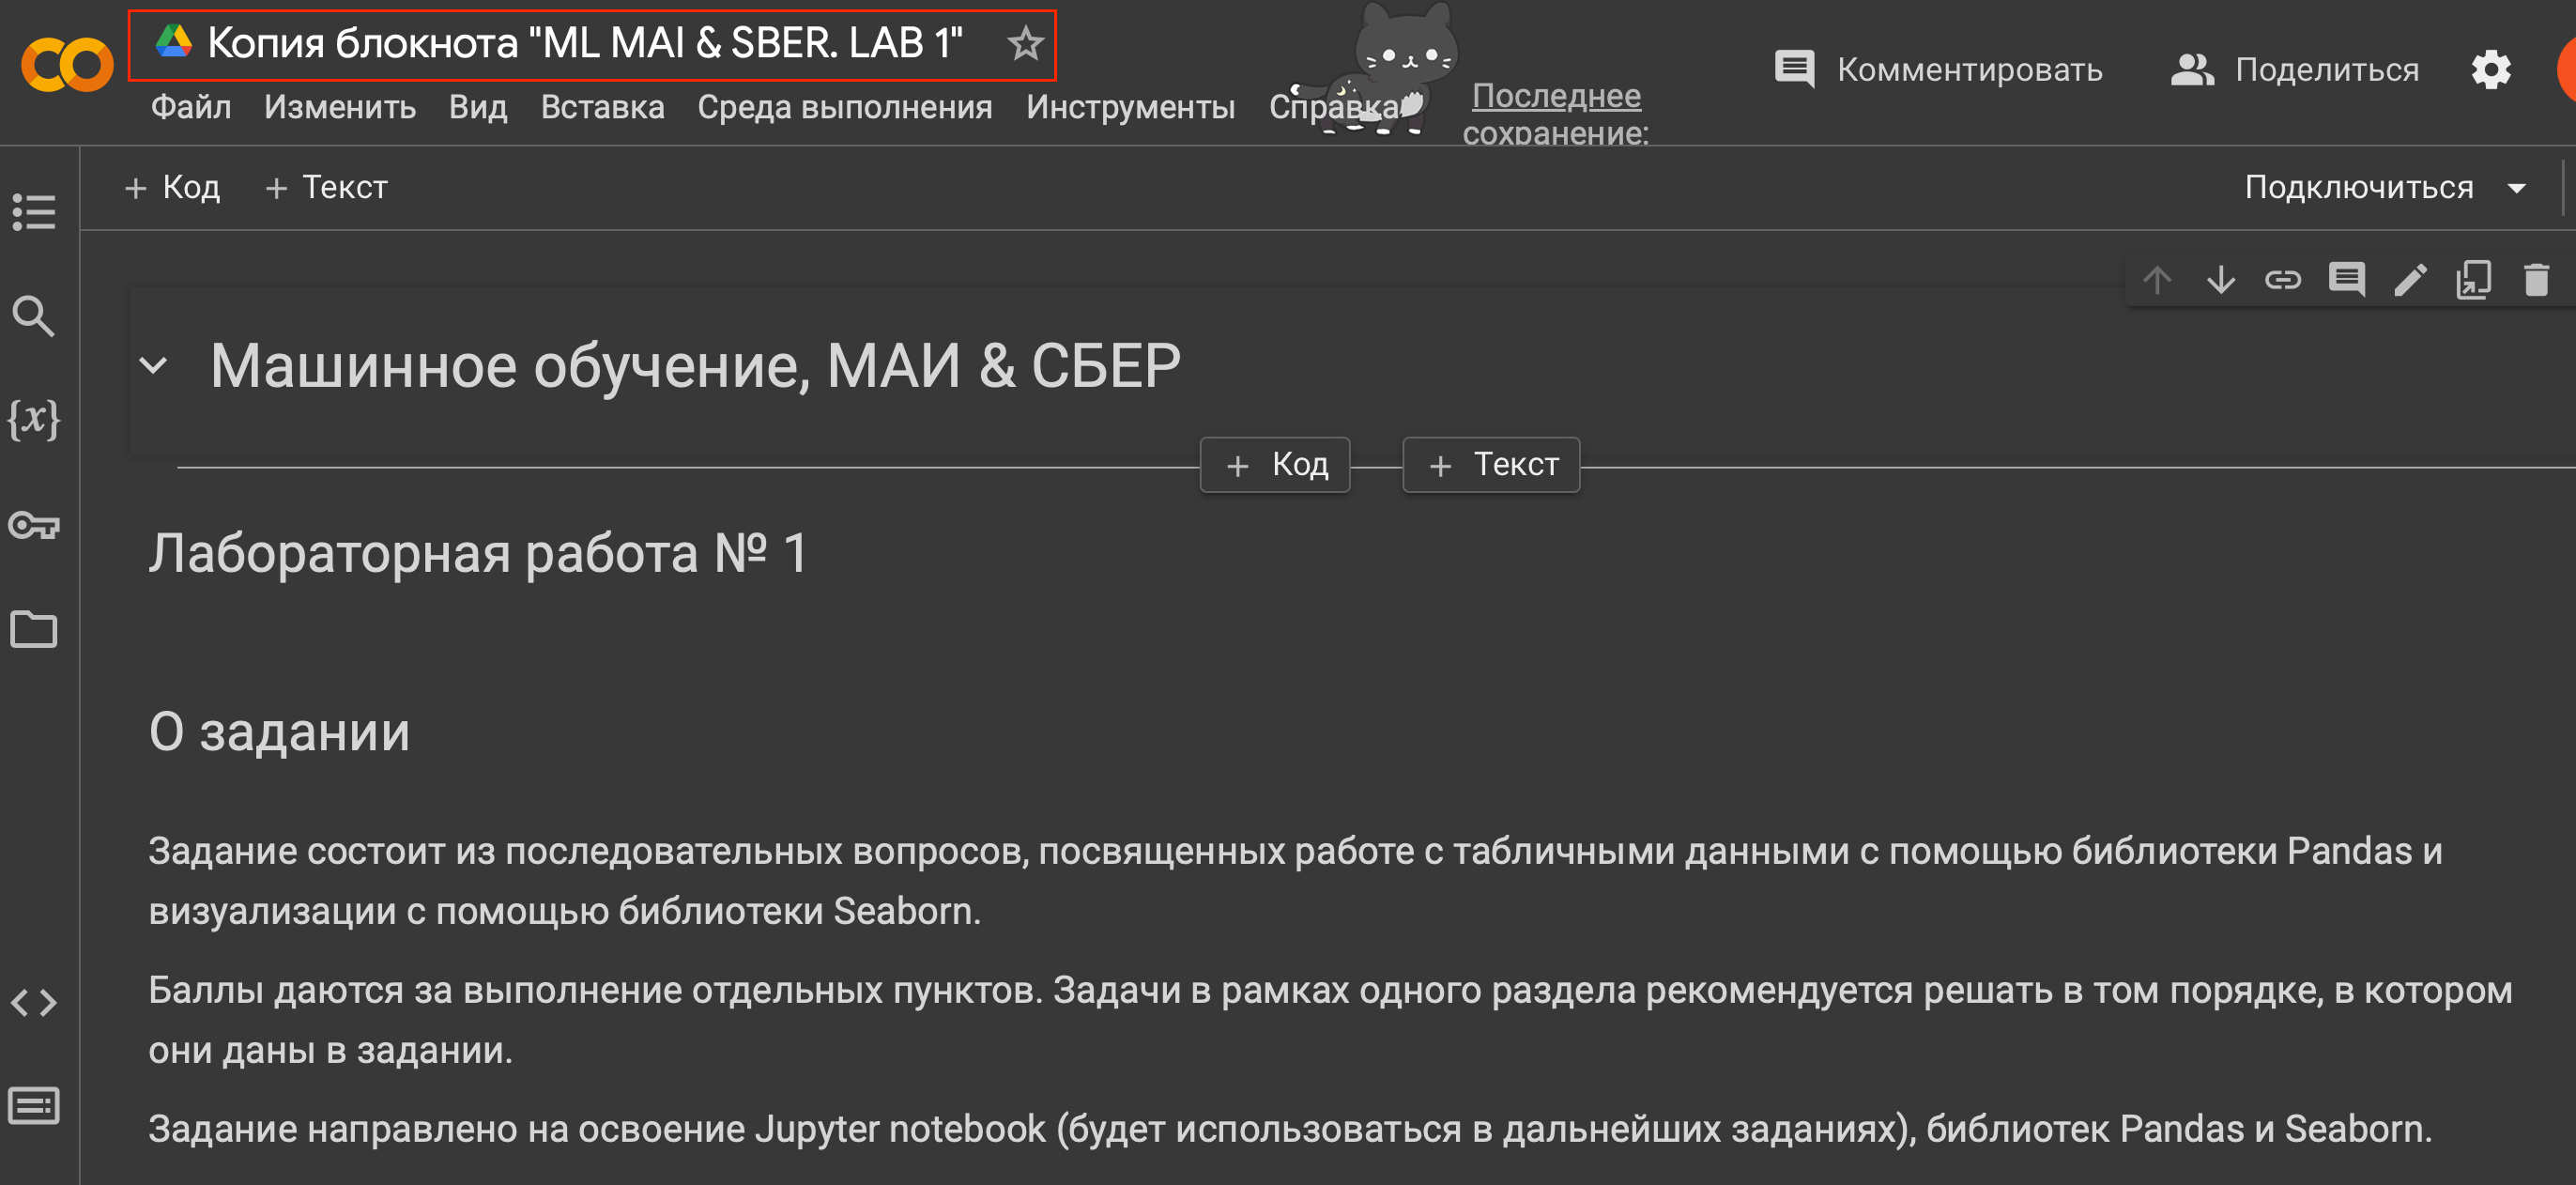

3. После выполнения домашнего задания нажмите кнопку "поделиться" и перейдите в режим доступно всем по ссылке

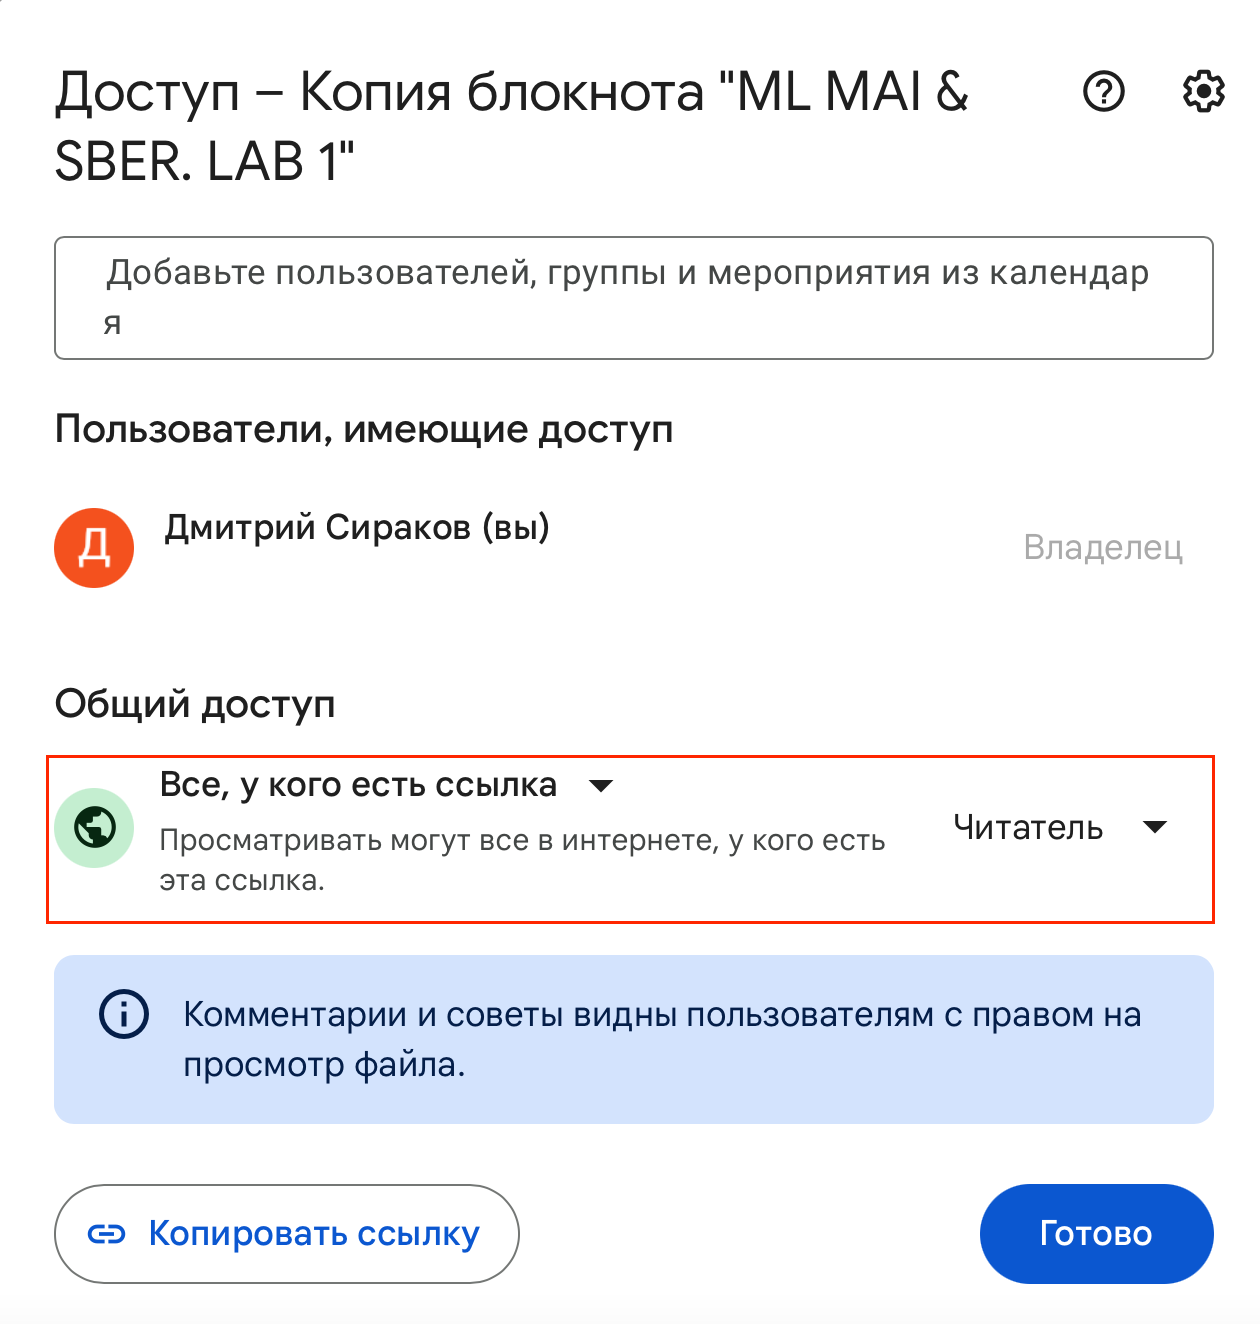

4. Загрузите эту ссылку в lms.mai.ru по курсу "Машинное обучение" в качестве ссылки в раздел "Pandas - работа с таблицами для машинного обучения (ЛР) [17.02]"


<h2>WIP</h2>

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

  Using cached folium-0.18.0-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached branca-0.8.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached xyzservices-2024.9.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached charset_normalizer-3.4.0-cp312-cp312-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached folium-0.18.0-py2.py3-none-any.whl (108 kB)
Using cached branca-0.8.0-py3-none-any.whl (25 kB)
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl (12.6 MB)
Using cached requests-2.32.3

In [ ]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

# Задание

## Часть 0. Подготовка [+0.5 балла]

**Задание 1 [+0.5 балла]**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

#kaggle потребовал от меня слишком много взаимодействия (создать json файл и API-ключ), поэтому…
import gdown

#!wget 'https://drive.google.com/uc?export=download&id=1GPk4LoUtvWofncPdWbTuDWTjhqcAskeH&export=download' -O train.csv
!gdown 1GPk4LoUtvWofncPdWbTuDWTjhqcAskeH -O train.csv


Downloading...
From (original): https://drive.google.com/uc?id=1GPk4LoUtvWofncPdWbTuDWTjhqcAskeH
From (redirected): https://drive.google.com/uc?id=1GPk4LoUtvWofncPdWbTuDWTjhqcAskeH&confirm=t&uuid=3366b0e5-7bc0-49b4-8697-e3ed95b53c62
To: /content/train.csv
100% 201M/201M [00:02<00:00, 74.9MB/s]


In [ ]:
df = pd.read_csv('train.csv')
df

id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
0               -73.964630         40.765602                  N            455  
1               -73.999481         40.731152                  N            663  
2               -74.005333         40.710087                  N           2124  
3               -74.012268         40.706718                  N            429  
4               -73.972923         40.782520                  N            435  
...                    ...               ...                ...            ...  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198  

[1458644 rows x 11 columns]

В колонке `dropoff_datetime` содержится информация о времени окончания поездки, однако эта колонка присутствует только в обучающей выборке и отсутствует в тестовой. Это создаёт проблему, так как при обучении модели мы не сможем использовать эту колонку для предсказаний на новых данных. В связи с этим, чтобы избежать ошибок и упростить анализ, рекомендуется удалить колонку `dropoff_datetime` из датасета.

Колонка `pickup_datetime` содержит дату и время начала поездки в формате строки, что затрудняет выполнение операций с датами и временем, таких как вычисление продолжительности поездки или анализ зависимости цены от времени суток. Преобразование этих данных в `datetime`-объекты позволит использовать методы для работы с датой (вместо огромного количества строк для решения какой-нибудь маленькой подзадачи будет использоваться один вызов метода)

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

df = df.drop(columns=['dropoff_datetime'])
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  trip_duration  
0               40.765602                  N            455  
1               40.731152                  N            663  
2               40.710087                  N           2124  
3               40.706718                  N            429  
4               40.782520                  N            435  
...                   ...                ...            ...  
1458639         40.740170                  N            778  
1458640         40.796547                  N            655  
1458641         40.707371                  N            764  
1458642         40.757107                  N            373  
1458643         40.790585                  N            198  

[1458644 rows x 10 columns]

В колонке `trip_duration` содержится значение, которое мы стремимся предсказать. Давайте изучим распределение целевой переменной в обучающем наборе данных. Для этого построим гистограмму этой переменной.

Построение гистограммы целевой переменной важно по нескольким причинам:

1. **Понимание распределения**: Гистограмма помогает нам увидеть, как распределены значения целевой переменной. Это может дать представление о том, является ли распределение нормальным, скошенным или имеет выбросы.

2. **Выявление аномалий**: При анализе гистограммы мы можем обнаружить аномальные значения или выбросы, которые могут повлиять на качество модели.

3. **Выбор подходящего алгоритма**: Понимание распределения целевой переменной может помочь в выборе наиболее правильного анализа датасета. Например, если данные сильно скошены, может потребоваться преобразование данных перед обучением модели. (как на практическом занятии, если у нас таргет расположен по экспоненте, то было бы классно предсказывать логарифм, а не экспоненту (подробнее было на лекции))


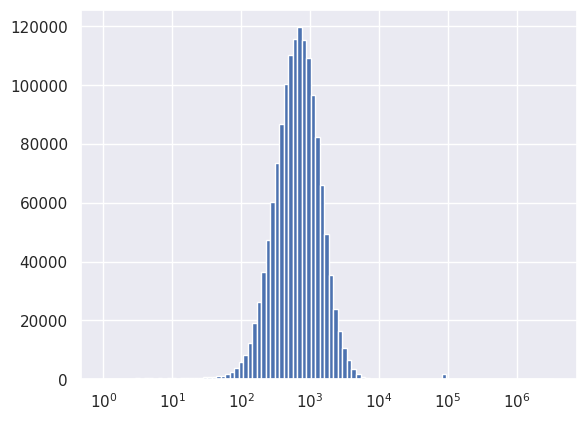

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64


In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

hist, bins = np.histogram(df['trip_duration'], bins=100)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(df['trip_duration'], bins=logbins)
plt.xscale('log')
plt.show()

print(df['trip_duration'].describe())

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Средняя длина поездки — 15 минут, редко меньше 8 или больше полутора часов. Также есть выбросы в районе значений 10^5 и 10^6.



В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Из-за того, что RMSE имеет крайне высокую чувствительность к большим ошибкам. RMSLE использует логарифмическую ошибку, что хорошо для датасета, где масштаб значений бывает разным.



Мы изучили несколько вариантов линейной регрессии в sklearn, но все они минимизировали среднеквадратичную ошибку (MSE), а не среднеквадратичную логарифмическую ошибку (RMSLE). Для работы с RMSLE мы можем использовать следующий подход: вместо прямого предсказания целевой переменной, мы будем предсказывать ее логарифм. Пусть $\hat{y}_i = \log{(y_i + 1)}$ будет модифицированной целевой переменной, а $\hat{a}(x_i)$ — предсказание модели, обученной на $\hat{y}_i$. Чтобы получить исходное предсказание, мы используем обратное преобразование: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

\

Это преобразование позволяет нам оптимизировать MSE для логарифмированных значений, что эквивалентно оптимизации RMSLE для исходных значений. Это связано с тем, что минимизация квадратичной ошибки между логарифмами прогнозов и реальных значений соответствует минимизации логарифмической ошибки между самими прогнозами и реальными значениями ***(для дополнительного балла можете доказать почему)***. Таким образом, этот подход позволяет использовать стандартные методы линейной регрессии для задач, где требуется минимизировать RMSLE.







MSE и MSLE схожи тем, что ошибка симметрична — log(y+1) - log(y^+1) = log((y+1)/(y^+1)), что означет, что для подсчёта ошибки используются отношения двух чисел.
Также, log((y+1)/(y^+1)) = abs(log((y^+1)/(y+1))), то есть отклонение от срединного значения равно по модулю.

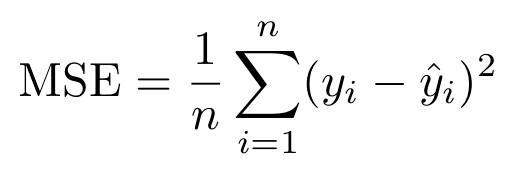
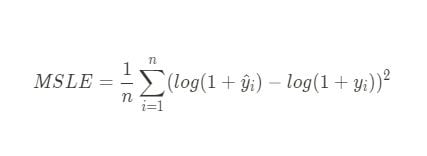

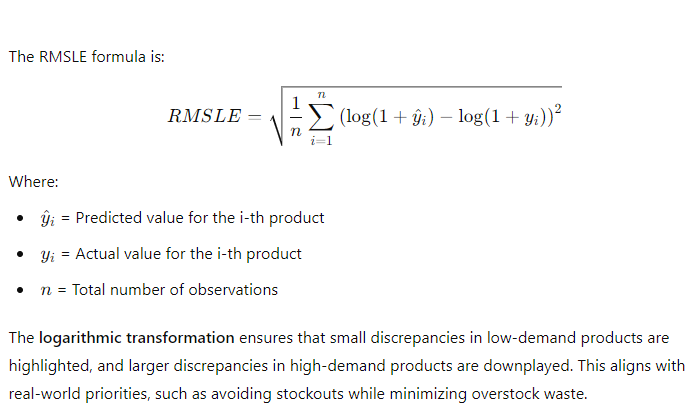

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

from sklearn.metrics import mean_squared_log_error

def rmsle_optimal(y_true):
    """
    Вычисляет RMSLE для наилучшего константного предсказания.

    Параметры:
    ----------
    y_true : array-like
        Массив истинных значений целевой переменной.

    Возвращает:
    -------
    rmsle_best_const : float
        Наилучшее значение RMSLE при константном предсказании.
    optimal_C : float
        Оптимальное константное значение для предсказания.
    """

    # Среднее арифметическое
    optimal_C_log = np.log1p(y_true).mean()

    # Экспонируем для изначального значения
    optimal_C = np.expm1(optimal_C_log)

    rmsle_best_const = np.sqrt(mean_squared_log_error(y_true, np.full_like(y_true, optimal_C)))

    return rmsle_best_const, optimal_C

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

***(Какая константа прекрасно оптимизирует RMSLE MSE (с преобразованиями?))***

In [ ]:
"""
Чтобы оптимизировать RMSLE, нам нужна константа перед логарифмом, чтобы мы могли
работать с нулями или отрицательными значениями данных. Обычный выбор — 1, тогда
log(y + C) = log(y + 1), что для нулевых значений даст log(1) = 0. Также можно
провести кросс-валидацию по target. Нам нужно найти такой y^, чтобы log(y^ + 1)
и log(y + 1) имели минимальное отклонение. Чтобы приблизиться, нам нужно взять
среднее значение, так как в случае с отклонениями в большую или меньшую сторону
мы получаем штрафы из-за большей ошибки.
Тогда y^ = exp(mean(log(y+1)))
"""

rmsle_best_const, optimal_C = rmsle_optimal(df['trip_duration'])
print(rmsle_best_const)
np.allclose(rmsle_best_const, 0.79575, 1e-4) # ответ конечно же нельзя подсматривать

0.7957596732502433


True

## Часть 1. Изучаем `pickup_datetime` & Обучаем модель [+1 балл]


**Задание 2 [+0.125 балла]**. Для начала давайте проанализируем общее количество поездок по дням. Построим график, отражающий зависимость числа поездок от конкретного дня в году (например, можно использовать `sns.countplot`).

Просмотр этой информации важен по нескольким причинам:

1. **Выявление закономерностей**: Анализ количества поездок по дням может помочь выявить определенные закономерности или тренды, например, повышенный спрос в выходные дни или праздничные периоды.

2. **Обнаружение аномалий**: График может помочь идентифицировать дни с необычно высоким или низким количеством поездок, что может указывать на наличие аномалий или особых событий.

3. **Корректировка моделей**: Если анализ показывает, что спрос сильно колеблется в зависимости от дня, это может потребовать учета этого фактора в моделях прогнозирования.

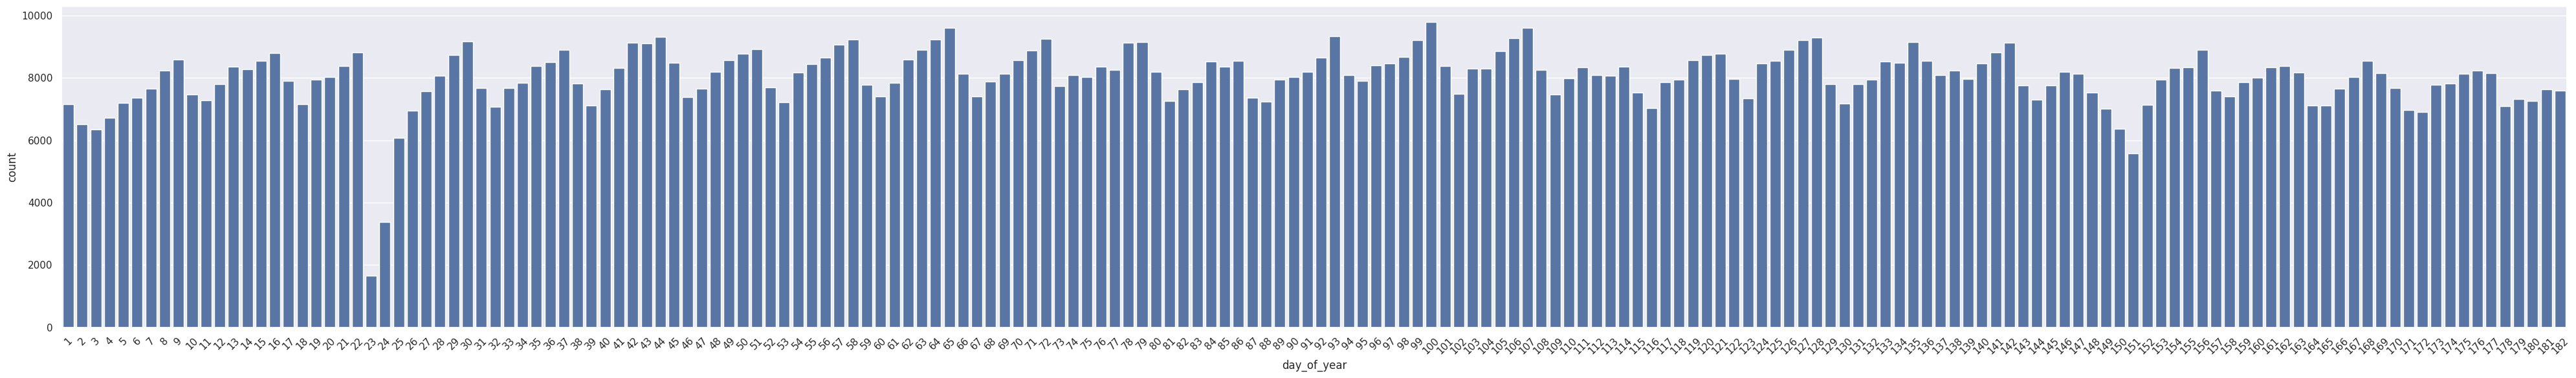

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

df['day_of_year'] = df['pickup_datetime'].dt.dayofyear
plt.figure(figsize=(40,6))
sns.countplot(x='day_of_year', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Расчёт двух скачков ниже 98%%

daily_counts = df.groupby('day_of_year').size()
daily_diff = daily_counts.diff()
#threshold = -daily_diff.quantile(0.98)
threshold = 6700
anomalous_days = daily_counts[daily_counts < threshold]
#dates_with_drops = pd.to_datetime(daily_counts.index[days_with_drops], format='%j')
dates_with_anomalies = pd.to_datetime(anomalous_days.index, format='%j')


print("Даты с резким снижением числа поездок:")
print(dates_with_anomalies)

# В Нью-Йорке 24.01.2016 были сильнейшие снегопады, 30.05.2016 произошла массовая стрельба. Это могло повлиять на количество поездок в следующий день

Даты с резким снижением числа поездок:
DatetimeIndex(['1900-01-02', '1900-01-03', '1900-01-23', '1900-01-24',
               '1900-01-25', '1900-05-30', '1900-05-31'],
              dtype='datetime64[ns]', name='day_of_year', freq=None)


**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

<Figure size 2000x600 with 0 Axes>

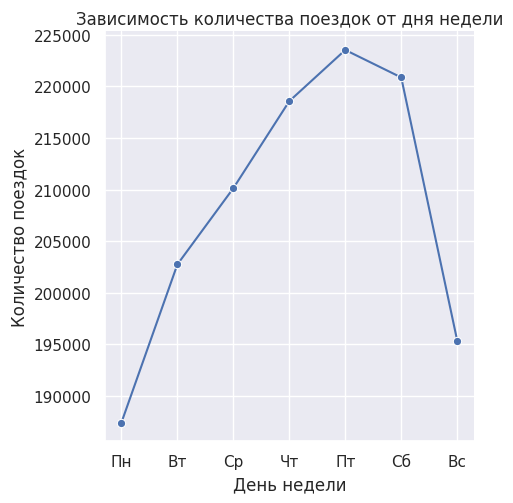

<Figure size 2000x600 with 0 Axes>

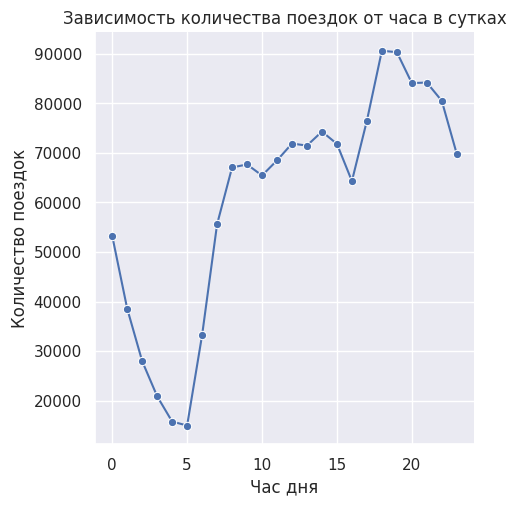

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

df['day_of_week'] = df['pickup_datetime'].dt.dayofweek  # 0 = понедельник, 6 = воскресенье
df['hour'] = df['pickup_datetime'].dt.hour  # Час в сутках (0-23)

# Считаем количество поездок для каждого дня недели
daily_weekday_counts = df.groupby('day_of_week').size().reset_index(name='trip_count')

# Считаем количество поездок для каждого часа в сутках
hourly_counts = df.groupby('hour').size().reset_index(name='trip_count')

# График зависимости от дня недели
plt.figure(figsize=(20, 6))
sns.relplot(x='day_of_week', y='trip_count', data=daily_weekday_counts, kind='line', marker='o')
plt.title('Зависимость количества поездок от дня недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.xticks(ticks=range(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.grid(True)
plt.show()

# График зависимости от часа в сутках
plt.figure(figsize=(20, 6))
sns.relplot(x='hour', y='trip_count', data=hourly_counts, kind='line', marker='o')
plt.title('Зависимость количества поездок от часа в сутках')
plt.xlabel('Час дня')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()

**Задание 3 [+0.25 балла]**. Постройте график, на котором будет отображена зависимость числа поездок от времени суток для различных месяцев. Используйте разные цвета для кривых, соответствующих разным месяцам, с помощью параметра `hue` в `sns.relplot`. Аналогичным образом постройте график, показывающий зависимость количества поездок от часа в сутках для разных дней недели.

Это важно по нескольким причинам:

1. **Выявление временных закономерностей**: Графики помогут увидеть, как спрос на поездки меняется в течение суток в разные месяцы и дни недели. Это может выявить определенные тренды, например, пиковые часы поездок или временные периоды с низким спросом.

2. **Адаптация к сезонности и недельным циклам**: Понимание того, как спрос на поездки меняется в зависимости от времени года и дня недели, позволяет адаптировать модель машинного обучения и сделать правильный feature-engineering (правильную предобработку данных)




<Figure size 1500x600 with 0 Axes>

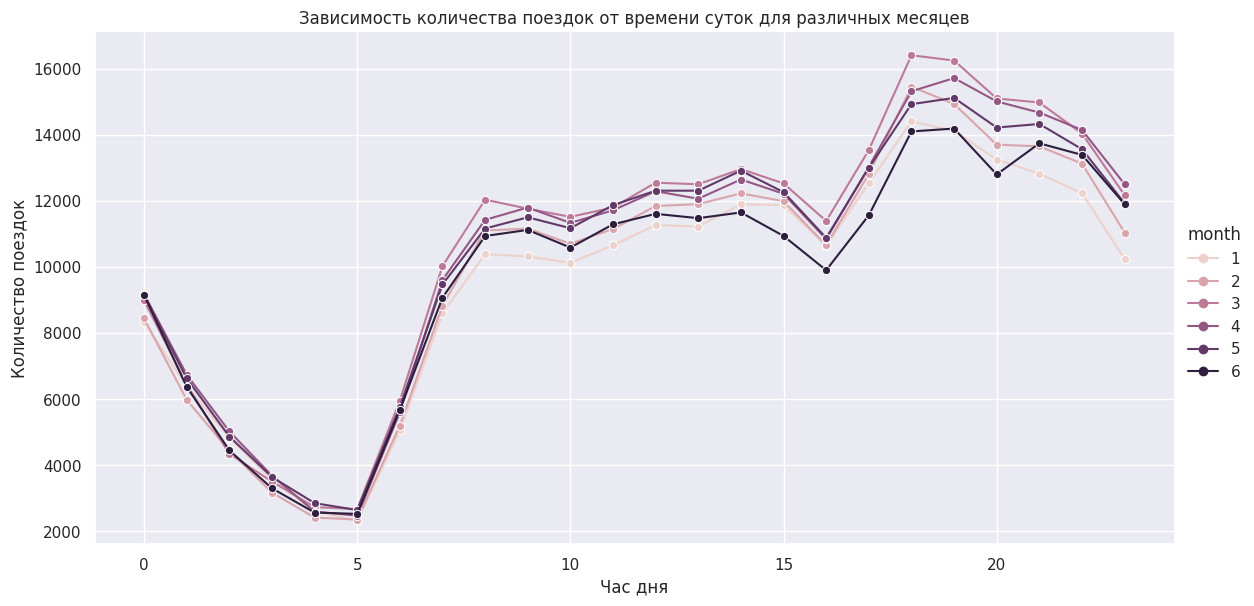

<Figure size 1500x600 with 0 Axes>

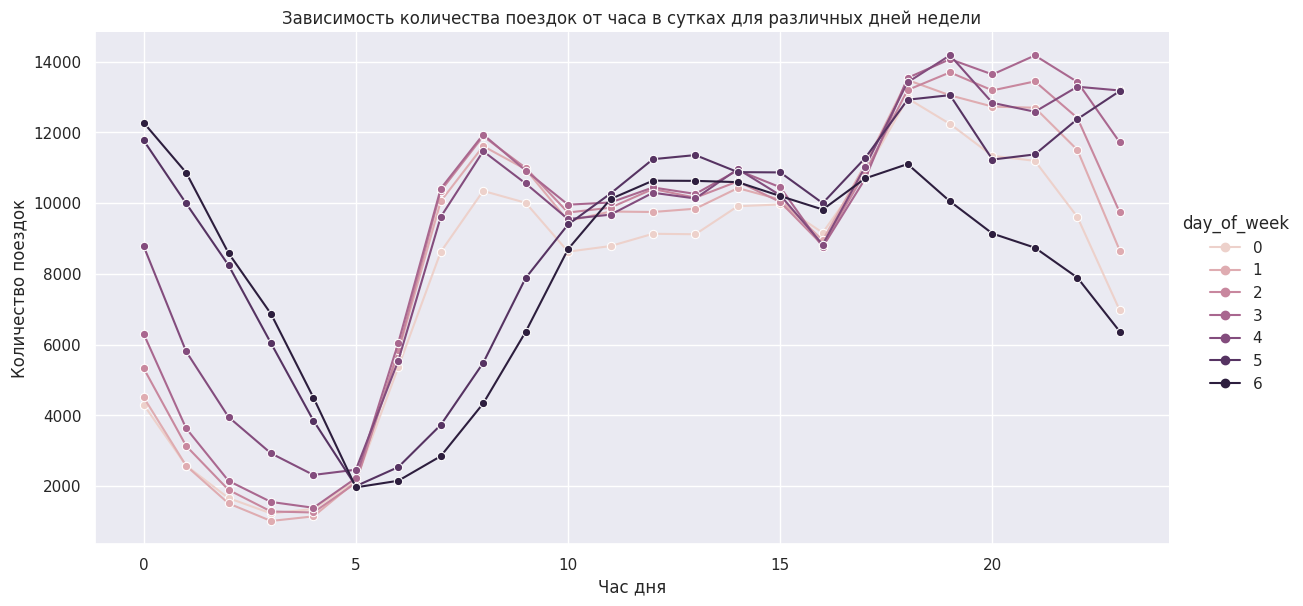

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

df['month'] = df['pickup_datetime'].dt.month  # Месяц (1-12)

# Считаем количество поездок для каждого часа и месяца
hourly_by_month = df.groupby(['month', 'hour']).size().reset_index(name='trip_count')

# Считаем количество поездок для каждого часа и дня недели
hourly_by_weekday = df.groupby(['day_of_week', 'hour']).size().reset_index(name='trip_count')

# График зависимости от времени суток для различных месяцев
plt.figure(figsize=(15, 6))
sns.relplot(x='hour', y='trip_count', data=hourly_by_month, kind='line', hue='month', marker='o', height=6, aspect=2)
plt.title('Зависимость количества поездок от времени суток для различных месяцев')
plt.xlabel('Час дня')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()

# График зависимости от часа в сутках для разных дней недели
plt.figure(figsize=(15, 6))
sns.relplot(x='hour', y='trip_count', data=hourly_by_weekday, kind='line', hue='day_of_week', marker='o', height=6, aspect=2)
plt.title('Зависимость количества поездок от часа в сутках для различных дней недели')
plt.xlabel('Час дня')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это может быть связано?

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Мало кто ездит рано утром (в пять утра), так как сервисы такси или сервисы, работающие допоздна, могут заканчивать работу примерно в это время (во втором случае это объясняет, почему отток такси происходит в пять утра — если условное место закрывается в четыре).

Самый популярный день недели — среда, а выходные дни отличаются больше всех. К вечеру, например, поездок на такси всё меньше, так как работяги едут домой пораньше, чтобы подготовиться к понедельнику.

**Задание 4 [+0.25 балла]**. Разделите данные на обучающую и тестовую выборки в соотношении 80:20 с помощью функции `train_test_split` из библиотеки `sklearn`. На основе обучающей выборки постройте график, показывающий зависимость логарифма среднего времени поездки от дня недели. Повторите этот процесс для часа в сутках и дня в году.

Посмотреть график распределения тренировочной выборки важно по нескольким причинам:

1. **Понимание данных**: Анализ тренировочной выборки помогает лучше понять распределение и характеристики данных, что важно для выбора и настройки моделей машинного обучения

2. **Выявление закономерностей**: Графики зависимостей могут выявить важные закономерности и тренды в данных, которые могут быть использованы для улучшения моделей прогнозирования.

3. **Избежание переобучения**: Анализируя только тренировочную выборку, мы избегаем риска "заглядывания в будущее" и переобучения модели, когда она слишком хорошо подгоняется под тестовые данные.


<Figure size 1500x600 with 0 Axes>

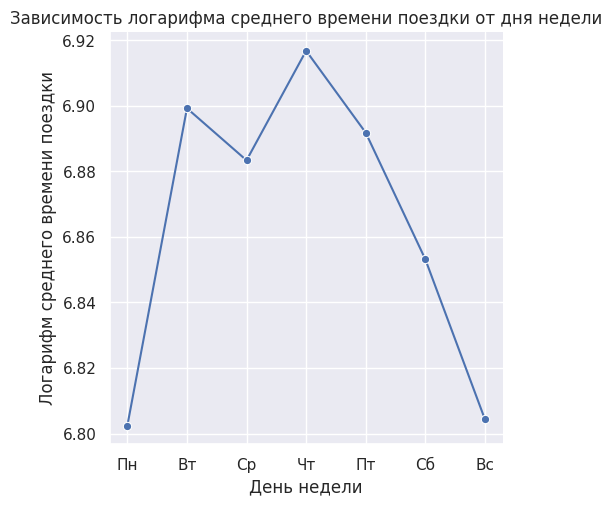

<Figure size 1500x600 with 0 Axes>

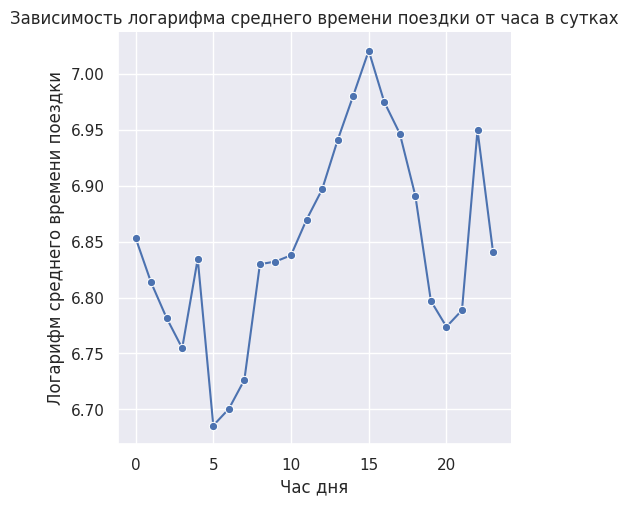

<Figure size 1500x600 with 0 Axes>

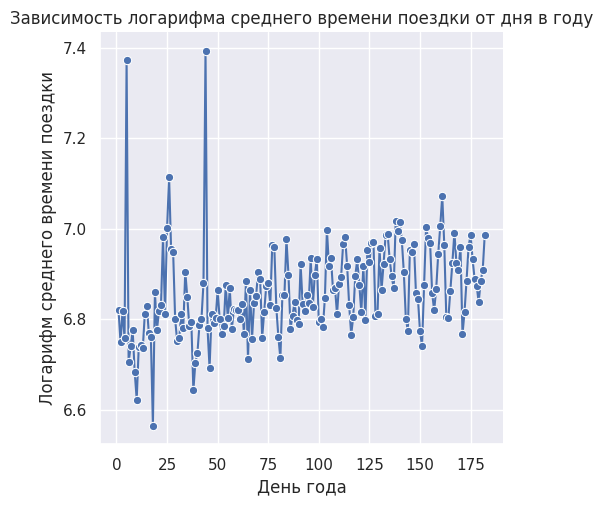

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

from sklearn.model_selection import train_test_split

# Разделяем данные на обучающую и тестовую выборки (80:20)
X_train, X_test, y_train, y_test = train_test_split(df.drop(['trip_duration'], axis=1), df['trip_duration'], test_size=0.2, random_state=42)

# Строим график зависимости логарифма среднего времени поездки от дня недели
daily_weekday_avg = X_train.copy()
daily_weekday_avg['trip_duration'] = y_train
weekday_avg = daily_weekday_avg.groupby('day_of_week')['trip_duration'].mean().reset_index()
weekday_avg['log_trip_duration'] = np.log1p(weekday_avg['trip_duration'])

plt.figure(figsize=(15, 6))
sns.relplot(x='day_of_week', y='log_trip_duration', data=weekday_avg, kind='line', marker='o')
plt.title('Зависимость логарифма среднего времени поездки от дня недели')
plt.xlabel('День недели')
plt.ylabel('Логарифм среднего времени поездки')
plt.xticks(ticks=range(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.grid(True)
plt.show()

# Строим график зависимости логарифма среднего времени поездки от часа в сутках
daily_hour_avg = X_train.copy()
daily_hour_avg['trip_duration'] = y_train
hour_avg = daily_hour_avg.groupby('hour')['trip_duration'].mean().reset_index()
hour_avg['log_trip_duration'] = np.log1p(hour_avg['trip_duration'])

plt.figure(figsize=(15, 6))
sns.relplot(x='hour', y='log_trip_duration', data=hour_avg, kind='line', marker='o')
plt.title('Зависимость логарифма среднего времени поездки от часа в сутках')
plt.xlabel('Час дня')
plt.ylabel('Логарифм среднего времени поездки')
plt.grid(True)
plt.show()

# Строим график зависимости логарифма среднего времени поездки от дня в году
daily_year_avg = X_train.copy()
daily_year_avg['trip_duration'] = y_train
year_avg = daily_year_avg.groupby('day_of_year')['trip_duration'].mean().reset_index()
year_avg['log_trip_duration'] = np.log1p(year_avg['trip_duration'])

plt.figure(figsize=(15, 6))
sns.relplot(x='day_of_year', y='log_trip_duration', data=year_avg, kind='line', marker='o')
plt.title('Зависимость логарифма среднего времени поездки от дня в году')
plt.xlabel('День года')
plt.ylabel('Логарифм среднего времени поездки')
plt.grid(True)
plt.show()

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Добавьте следующие признаки на основе `pickup_datetime` (не зря мы преобразовывали это в первых этапах):
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

Разбиение даты на отдельные признаки важно по нескольким причинам:

1. **Выявление временных закономерностей**: Разделение даты на день недели, месяц и час помогает выявить закономерности в данных, связанные с временем суток, днями недели и сезонностью.

2. **Улучшение прогностической способности модели**: Добавление этих признаков может улучшить точность моделей машинного обучения, поскольку они могут захватывать важные временные зависимости в данных.

3. **Адаптация к аномальным событиям**: Бинарные признаки, указывающие на аномальные периоды, позволяют модели учитывать особые ситуации, которые могут существенно отличаться от обычных условий.

4. **Повышение интерпретируемости**: Разбиение даты на отдельные компоненты делает модель более интерпретируемой, позволяя легче понять, как различные временные факторы влияют на целевую переменную.

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

"""Определены ранее
# df['day_of_week'] = df['pickup_datetime'].dt.dayofweek  # 0 = понедельник, 6 = воскресенье
# df['month'] = df['pickup_datetime'].dt.month  # Месяц (1-12)
# df['hour'] = df['pickup_datetime'].dt.hour  # Час в сутках (0-23)
# df['day_of_year'] = df['pickup_datetime'].dt.dayofyear
"""
df['is_peak_hour'] = ((df['hour'] >= 7) & (df['hour'] < 9) | (df['hour'] >= 17) & (df['hour'] < 21)) & (df['day_of_week'] < 5)
df['is_accident'] = (df['pickup_datetime'].dt.date == pd.to_datetime('2016-01-23').date()) | (df['pickup_datetime'].dt.date == pd.to_datetime('2016-01-24').date()) | (df['pickup_datetime'].dt.date == pd.to_datetime('2016-05-30').date()) | (df['pickup_datetime'].dt.date == pd.to_datetime('2016-05-31').date())

# Проверяем результат
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  day_of_year  day_of_week  hour  month  \
0                  N            455           74            0    17      3   
1                  N            663          164            6     0      6   
2                  N           2124           19            1    11      1   
3                  N            429           97            2    19      4   
4                  N            435           86            5    13      3   

   is_peak_hour  is_accident  
0          True        False  
1         False        False  
2         False        False  
3          True        False  
4         False        False

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

Категориальные признаки:

*   day_of_week — каждое значение влияет на прогноз
*   month
*   hour — каждый час имеет свою специфику
*   day_of_year — значения нельзя сопоставить по величине

Бинарные:
*   is_peak_hour — принимает True/False
*   is_accident — принимает True/False



**Задание 5 [+0.375 балла]**.
Обучите регрессию `Ridge` с использованием параметров по умолчанию, применив `OneHotEncoder` для кодирования всех категориальных признаков и `StandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы определили в этой части задания. Замерьте качество на тестовой выборке (RMSLE)

Применение `OneHotEncoder` и `StandardScaler` важно по следующим причинам:

1. **OneHotEncoder для категориальных признаков**: Категориальные признаки необходимо преобразовать в числовой формат перед использованием в линейной регрессии. `OneHotEncoder` преобразует категориальные переменные в бинарные векторы, что позволяет модели корректно интерпретировать эти признаки без внесения искажений, связанных с порядком значений.

2. **StandardScaler для численных признаков**: Масштабирование численных признаков с помощью `StandardScaler` помогает стандартизировать данные, приводя их к одному масштабу с нулевым средним и единичным стандартным отклонением. Это улучшает интерпретацию весов линейной модели (а также мы обсудим на лекции, почему это ускоряет обучение модели)


In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error

numeric_features = []
categorical_features = ['day_of_week', 'month', 'hour', 'day_of_year']
binary_features = ['is_peak_hour', 'is_accident']
target = 'trip_duration'

# Разделяем данные на признаки и целевую переменную
X = df[categorical_features + binary_features + numeric_features]
y = df[target]

# Разделяем данные на обучающую и тестовую выборки (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем ColumnTransformer с OneHotEncoder для категориальных и StandardScaler для числовых признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Создаем пайплайн, который сначала обрабатывает данные, затем обучает модель Ridge
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Обучаем модель
model.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test) + np.log1p(optimal_C)

# Вычисляем RMSLE
rmsle_score = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f'RMSLE на тестовой выборке: {rmsle_score:.4f}')

RMSLE на тестовой выборке: 0.8879


## Часть 2. Изучаем координаты & Обучаем модель [+1.5 балла]




Теперь, когда мы подробно изучили временные аспекты данных о поездках, давайте переключим наше внимание на географические данные, а именно на координаты начала и конца поездок. Мы предоставили вам функцию, которая отображает на карте точки начала или конца поездок. Однако обратите внимание, что для эффективности этой функции мы используем только небольшой фрагмент данных, иначе обработка займет слишком много времени.

Анализ координат важен по нескольким причинам:

1. **Пространственный анализ**: Координаты позволяют проводить пространственный анализ, который может выявить географические закономерности в данных, такие как популярные места отправления и назначения, районы с высоким спросом и т. д.

2. **Улучшение точности прогнозов**: Включение географических признаков в модели прогнозирования может повысить их точность, поскольку координаты могут быть связаны с различными факторами, влияющими на длительность поездок и спрос на транспортные услуги.

In [ ]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    Рисует карту с кругами, представляющими точки данных.

    Параметры
    ----------
    data : DataFrame
        DataFrame, содержащий колонки с широтой и долготой.
    latitude_column : str
        Название колонки в DataFrame, содержащей координаты широты.
    longitude_column : str
        Название колонки в DataFrame, содержащей координаты долготы.
    color : str
        Цвет кругов, которые будут нарисованы на карте.

    Возвращает
    -------
    folium.Map
        Объект карты Folium с нарисованными кругами в указанных координатах.

    Примеры
    --------
    >>> import pandas as pd
    >>> data = pd.DataFrame({
    ...     'latitude': [37.773972, 37.774159],
    ...     'longitude': [-122.431297, -122.431297]
    ... })
    >>> show_circles_on_map(data, 'latitude', 'longitude', 'blue')
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [ ]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [ ]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Наиболее интересные скопления точек — на пересечении 7th Avenue и 32-33 West. Примечательно, что обе точки интереса испытывают пик как на подборе, так и на высадке пассажиров. Также всплеск на приёме новых пассажиров есть у Columbus Circle, а высадке — Amsterdam Avenue. Это основные точки интереса города, либо популярные среди рабочих, либо туристов и тех, кто ищет рекреационной деятельности. Также есть всплеск у аэропорта

**Задание 6 [+0.375 балла]**. Как нам хорошо известно, время поездки $t$ связано с расстоянием $s$ и средней скоростью $v_{\text{ср}}$ соотношением $t = s / v_{\text{ср}}$. Из этого следует, что расстояние между начальной и конечной точками поездки является одним из ключевых факторов, влияющих на время поездки. Хотя мы не можем точно определить полный маршрут, который преодолеет такси, мы можем оценить это расстояние, рассчитав кратчайшее расстояние между точками начала и конца поездки. Для корректного вычисления расстояния между двумя точками на поверхности Земли можно использовать функцию `haversine`. Рассчитайте кратчайшее расстояние для каждого объекта в данных и сохраните его в колонку `haversine`.

Это важно по нескольким причинам:

1. **Улучшение точности модели**: Включение расстояния как признака в модель может значительно улучшить точность прогнозирования времени поездки, поскольку оно напрямую влияет на длительность поездки.

2. **Понимание взаимосвязей**: Анализ зависимости времени поездки от расстояния может помочь выявить взаимосвязи и закономерности в данных, что полезно для понимания динамики транспортных потоков.


In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

from sklearn.metrics.pairwise import haversine_distances

def calculate_haversine(row):
    start = [row['pickup_latitude'], row['pickup_longitude']]
    end = [row['dropoff_latitude'], row['dropoff_longitude']]

    start_rad = np.radians(start)
    end_rad = np.radians(end)

    distance = haversine_distances([start_rad, end_rad])[0, 1] * 6371
    return distance

df['haversine'] = df.apply(calculate_haversine, axis=1)

df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'haversine']].head()


pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude  \
0        40.767937        -73.982155         40.765602         -73.964630   
1        40.738564        -73.980415         40.731152         -73.999481   
2        40.763939        -73.979027         40.710087         -74.005333   
3        40.719971        -74.010040         40.706718         -74.012268   
4        40.793209        -73.973053         40.782520         -73.972923   

   haversine  
0   1.498521  
1   1.805507  
2   6.385098  
3   1.485498  
4   1.188588

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

df['log_haversine'] = np.log1p(df['haversine'])
df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'haversine', 'log_haversine']].head()


pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude  \
0        40.767937        -73.982155         40.765602         -73.964630   
1        40.738564        -73.980415         40.731152         -73.999481   
2        40.763939        -73.979027         40.710087         -74.005333   
3        40.719971        -74.010040         40.706718         -74.012268   
4        40.793209        -73.973053         40.782520         -73.972923   

   haversine  log_haversine  
0   1.498521       0.915699  
1   1.805507       1.031584  
2   6.385098       1.999464  
3   1.485498       0.910473  
4   1.188588       0.783257

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [ ]:
df['log_trip_duration'] = np.log(df['trip_duration'])
your_df = df
your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

True

**Задание 7 [+0.375 балла]**. Давайте проанализируем среднюю скорость движения такси. Для каждого объекта в обучающей выборке вычислите среднюю скорость, разделив значение в колонке `haversine` на значение в колонке `trip_duration`. Затем постройте гистограмму распределения полученных значений средней скорости.


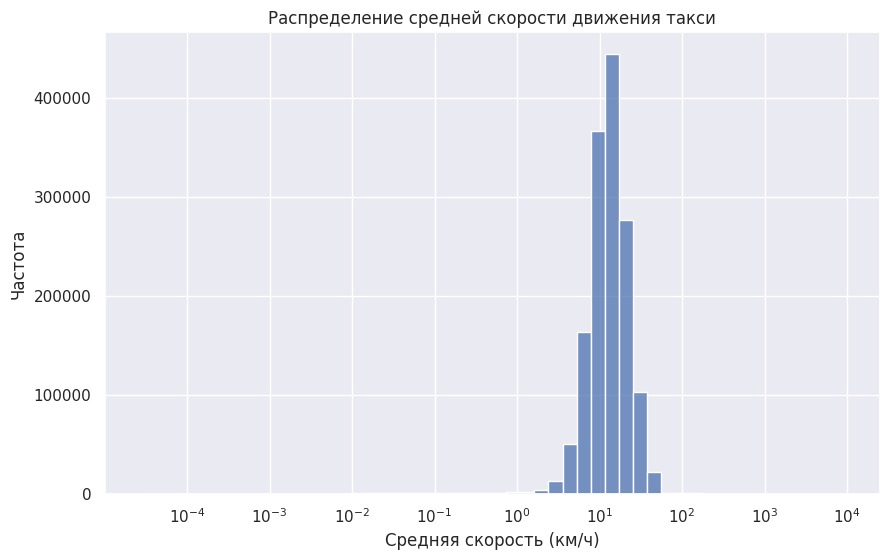

In [ ]:
df['average_speed'] = (df['haversine'] / df['trip_duration']) * 3600

plt.figure(figsize=(10, 6))
sns.histplot(df['average_speed'], bins=50, log_scale=True)
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Частота')
plt.title('Распределение средней скорости движения такси')
plt.show()


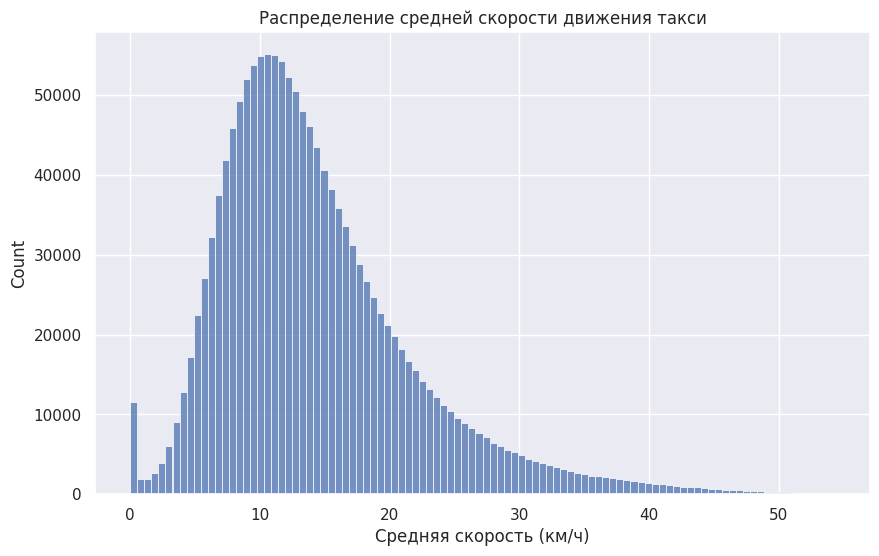

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

speed_percentile = np.percentile(df['average_speed'], 99.9)

df_filtered = df[df['average_speed'] <= speed_percentile]

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['average_speed'], bins=100)
plt.xlabel('Средняя скорость (км/ч)')
plt.title('Распределение средней скорости движения такси')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

df = df.drop(columns=['average_speed'])

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Короткие поездки вызывают значительные выбросы, сама средняя скорость является производной от других признаков, что может помешать модели, так как она будет видеть влияние этого значения, несмотря на то, что на самом деле влияют расстояние и скорость, а также вызвать линейную коллениарность между средней скоростью и расстоянием со временем.

In [ ]:
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  day_of_year  day_of_week  hour  month  \
0                  N            455           74            0    17      3   
1                  N            663          164            6     0      6   
2                  N           2124           19            1    11      1   
3                  N            429           97            2    19      4   
4                  N            435           86            5    13      3   

   is_peak_hour  is_accident  haversine  log_haversine  log_trip_duration  
0          True        False   1.498521       0.915699           6.120297  
1         False        False   1.805507       1.031584           6.496775  
2         False        False   6.385098       1.999464           7.661056  
3          True        False   1.485498       0.910473           6.061457  
4         False        False   1.188588       0.783257           6.075346

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 8 [+0.625 балла]**. Сейчас мы практически не используем прямые значения координат в анализе. Это связано с тем, что широта и долгота по отдельности не несут значимой информации, а их взаимосвязь с целевой переменной нелинейна. Чтобы эффективно интегрировать координаты в наш анализ, мы можем применить следующий подход: окружим область с наибольшим количеством поездок прямоугольником и разделим этот прямоугольник на ячейки. Каждой точке присвоим номер ячейки, в которой она находится, а точкам вне прямоугольника присвоим значение -1.

Создайте трансформер, который вначале делит указанную область на ячейки, а затем генерирует два признака: номер ячейки начала поездки и номер ячейки конца поездки. Выбор количества строк и столбцов оставьте на ваше усмотрение.

Важно, чтобы все вычисления были векторизованными, трансформер не изменял исходный набор данных, а все необходимые статистики вычислялись только по обучающей выборке в методе `fit`.

Этот подход важен по следующим причинам:

1. **Учет пространственной структуры**: Разбиение на ячейки позволяет учесть пространственную структуру данных, что может улучшить качество анализа и прогнозирования.

2. **Снижение размерности**: Преобразование координат в номера ячеек уменьшает размерность данных, что упрощает анализ и сокращает время вычислений.

3. **Улучшение интерпретируемости**: Номера ячеек могут быть более интерпретируемыми, чем сырые координаты, что облегчает понимание взаимосвязей в данных.

4. **Адаптация к нелинейным зависимостям**: Такой подход позволяет адаптироваться к нелинейным зависимостям между координатами и целевой переменной, что может повысить точность моделей.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    """
    Трансформер для преобразования географических координат в номера ячеек сетки.

    Параметры
    ----------
    n_rows : int
        Количество строк сетки.
    n_cols : int
        Количество столбцов сетки.
    lat_min : float
        Минимальная широта области.
    lat_max : float
        Максимальная широта области.
    lon_min : float
        Минимальная долгота области.
    lon_max : float
        Максимальная долгота области.

    Атрибуты
    ----------
    cell_size_lat : float
        Размер ячейки сетки по широте.
    cell_size_lon : float
        Размер ячейки сетки по долготе.

    Методы
    -------
    fit(X, y=None)
        Находит параметры сетки на основе данных.
    transform(X)
        Преобразует координаты в номера ячеек сетки.
    show_map()
        Отображает карту с ячейками сетки.
    """

    def __init__(self, n_rows, n_cols, lat_min, lat_max, lon_min, lon_max):
        self.n_rows = n_rows
        self.n_cols = n_cols
        self.lat_min = lat_min
        self.lat_max = lat_max
        self.lon_min = lon_min
        self.lon_max = lon_max

    def fit(self, X=None, y=None):
        """
        Находит параметры сетки на основе данных.

        Параметры
        ----------
        X : array-like, shape [n_samples, 2]
            Входные данные с координатами (широта, долгота).
        y : Ignored
            Не используется, существует для совместимости со стандартами sklearn.

        Возвращает
        -------
        self : object
            Возвращает себя.
        """

        # Рассчитываем размеры ячеек
        self.cell_size_lat = (self.lat_max - self.lat_min) / self.n_rows
        self.cell_size_lon = (self.lon_max - self.lon_min) / self.n_cols

        return self

    def transform(self, X):
        """
        Преобразует координаты в номера ячеек сетки.

        Параметры
        ----------
        X : array-like, shape [n_samples, 2]
            Входные данные с координатами (широта, долгота).

        Возвращает
        -------
        X_transformed : array, shape [n_samples, 2]
            Преобразованные данные с номерами ячеек (номер строки, номер столбца).
        """

        lat_idx = ((X[:, 0] - self.lat_min) / self.cell_size_lat).astype(int)
        lon_idx = ((X[:, 1] - self.lon_min) / self.cell_size_lon).astype(int)

        lat_idx = np.where((lat_idx >= 0) & (lat_idx < self.n_rows), lat_idx, -1)
        lon_idx = np.where((lon_idx >= 0) & (lon_idx < self.n_cols), lon_idx, -1)

        X_transformed = np.c_[lat_idx, lon_idx]

        return X_transformed

    def show_map(self, X):
        """
        Отображает карту с ячейками сетки.

        Возвращает
        ---------
        m : Object
            Folium Map Object, карта с ячейками сетки
        """
        center_lat = (self.lat_min + self.lat_max) / 2
        center_lon = (self.lon_min + self.lon_max) / 2
        m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

        for row in range(self.n_rows):
            for col in range(self.n_cols):
                lat_start = self.lat_min + row * self.cell_size_lat
                lat_end = lat_start + self.cell_size_lat
                lon_start = self.lon_min + col * self.cell_size_lon
                lon_end = lon_start + self.cell_size_lon

                folium.Rectangle(
                    bounds=[[lat_start, lon_start], [lat_end, lon_end]],
                    color="red",
                    weight=1,
                    fill=True,
                    fill_opactiy=0.05
                ).add_to(m)

        # добавление точек

        for _, row in X.iterrows():
            folium.Circle(
                radius=10,
                location=(row['pickup_latitude'], row['pickup_longitude']),
                color='blue',
                fill_color='blue',
                fill=True,
                fill_opacity=0.5
            ).add_to(m)

        for _, row in X.iterrows():
            folium.Circle(
                radius=10,
                location=(row['dropoff_latitude'], row['dropoff_longitude']),
                color='yellow',
                fill_color='yellow',
                fill=True,
                fill_opacity=0.5
            ).add_to(m)

        return m


df.head()

# minimal_lat = round(df[['pickup_latitude', 'dropoff_latitude']].quantile(0.01).min(), 2)
# minimal_lon = round(df[['pickup_longitude', 'dropoff_longitude']].quantile(0.01).min(), 2)

# maximum_lat = round(df[['pickup_latitude', 'dropoff_latitude']].quantile(0.9).max(), 2) #+ 0.05 # колхоз
# maximum_lon = round(df[['pickup_longitude', 'dropoff_longitude']].quantile(0.9).max(), 2) #+ 0.05

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  day_of_year  day_of_week  hour  month  \
0                  N            455           74            0    17      3   
1                  N            663          164            6     0      6   
2                  N           2124           19            1    11      1   
3                  N            429           97            2    19      4   
4                  N            435           86            5    13      3   

   is_peak_hour  is_accident  haversine  log_haversine  log_trip_duration  
0          True        False   1.498521       0.915699           6.120297  
1         False        False   1.805507       1.031584           6.496775  
2         False        False   6.385098       1.999464           7.661056  
3          True        False   1.485498       0.910473           6.061457  
4         False        False   1.188588       0.783257           6.075346

**Задание 9 [+0.125 балла]**. Обучите регрессию `Ridge` с использованием параметров по умолчанию, применив `OneHotEncoder` для кодирования всех категориальных признаков и `StandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы определили до этой части задания. Замерьте качество на тестовой выборке (RMSLE)

In [ ]:
numeric_features = ['log_haversine']
categorical_features = ['day_of_week', 'month', 'hour', 'day_of_year']
binary_features = ['is_peak_hour', 'is_accident']
target = 'log_trip_duration'

X = df
y = df[target]

transformer = MapGridTransformer(n_rows=10, n_cols=10, lat_min=40.7, lat_max=40.8, lon_min=-74.02, lon_max=-73.92)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[['pickup_cell', 'dropoff_cell']] = transformer.fit_transform(X_train[['pickup_latitude', 'pickup_longitude']].values)
X_test[['pickup_cell', 'dropoff_cell']] = transformer.transform(X_test[['pickup_latitude', 'pickup_longitude']].values)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test) + np.log1p(optimal_C)

rmsle_score = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f'RMSLE на тестовой выборке: {rmsle_score:.4f}')



RMSLE на тестовой выборке: 0.6350


In [ ]:
transformer.show_map(df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].sample(1000))

## Часть 3. Изучаем оставшиеся признаки & Обучаем модель [+0.5 балла]


**Задание 10 [+0.375 балла]**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

for i in ['vendor_id', 'passenger_count', 'store_and_fwd_flag']:
    print(i, df[i].nunique())

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

`vendor_id` показывает провайдера статистики (CMT и VeriFone), что не очень полезно для нашей задачи

`passenger_count` может помочь вычислить количество людей и наиболее людные места, что также не является целью задачи. Также пассажиры могут высаживаться в разных местах

`store_and_fwd_flag` показывает, сколько автомобилей имеют постоянное подключение к серверам, что не влияет на качество работы такси

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

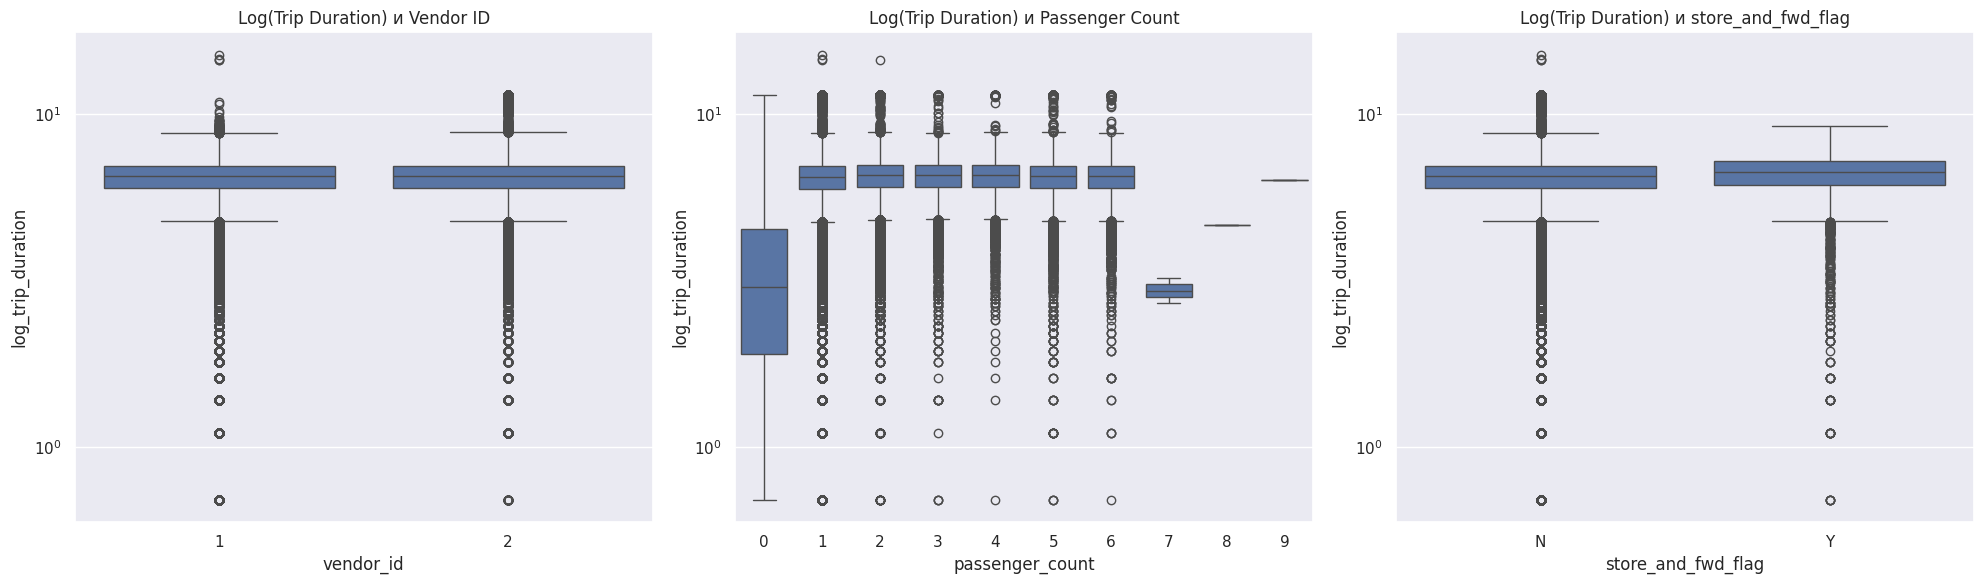

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.yscale('log')
sns.boxplot(x='vendor_id', y='log_trip_duration', data=df)
plt.title('Log(Trip Duration) и Vendor ID')

plt.subplot(1, 3, 2)
plt.yscale('log')
sns.boxplot(x='passenger_count', y='log_trip_duration', data=df)
plt.title('Log(Trip Duration) и Passenger Count')

plt.subplot(1, 3, 3)
plt.yscale('log')
sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=df)
plt.title('Log(Trip Duration) и store_and_fwd_flag')

plt.tight_layout()
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

df['vendor_id'] = df['vendor_id'].replace({1: 0, 2: 1})
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

`vendor_id` и `store_flag_duration` вряд ли будет значительным, так как статистика предоставлена поровну.

passenger_count может иметь значение, так как значения в меру отличаются.

In [ ]:
#df.replace(0, 1e-5, inplace=True) # Опасный код, ломающий жизни, датасет и, запущенный по глупости, отнимающий полчаса на тупняк колабы
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          1 2016-03-14 17:24:55                1   
1  id2377394          0 2016-06-12 00:43:35                1   
2  id3858529          1 2016-01-19 11:35:24                1   
3  id3504673          1 2016-04-06 19:32:31                1   
4  id2181028          1 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

   store_and_fwd_flag  trip_duration  day_of_year  day_of_week  hour  month  \
0                   0            455           74            0    17      3   
1                   0            663          164            6     0      6   
2                   0           2124           19            1    11      1   
3                   0            429           97            2    19      4   
4                   0            435           86            5    13      3   

   is_peak_hour  is_accident  haversine  log_haversine  log_trip_duration  
0          True        False   1.498521       0.915699           6.120297  
1         False        False   1.805507       1.031584           6.496775  
2         False        False   6.385098       1.999464           7.661056  
3          True        False   1.485498       0.910473           6.061457  
4         False        False   1.188588       0.783257           6.075346

**Задание 11 [+0.125 балла]**. Обучите регрессию `Ridge` с использованием параметров по умолчанию, применив `OneHotEncoder` для кодирования всех категориальных признаков и `StandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы определили в этой части задания. Замерьте качество на тестовой выборке (RMSLE)

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

features = ['vendor_id', 'passenger_count', 'store_and_fwd_flag']
target = 'log_trip_duration'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_log = np.log1p(y_train)

categorical_features = ['vendor_id', 'store_and_fwd_flag']
numeric_features = ['passenger_count']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

model.fit(X_train, y_train_log)

y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)

rmsle_score = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f'RMSLE на тестовой выборке: {rmsle_score:.4f}')

RMSLE на тестовой выборке: 0.1145


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [ ]:
df.drop(columns=['vendor_id'], inplace=True)
df.drop(columns=['store_and_fwd_flag'], inplace=True)
df.drop(columns=['passenger_count'], inplace=True)
df.head()

## Часть 4. Улучшаем модель [+1.5 балла]

**Задание 12 [+0.5 балла]**. В нашем наборе данных присутствуют аномальные записи: объекты с необычно коротким временем поездки, слишком большим пройденным расстоянием или с большими остатками после регрессии. В этом задании предлагается исключить такие объекты из обучающего набора. Для этого постройте гистограммы распределения указанных величин, определите объекты, которые можно считать выбросами, и очистите __обучающий набор__ от них.

Следует отметить, что, несмотря на то что эти объекты кажутся выбросами, в тестовом наборе данных также могут присутствовать объекты с аналогичными аномальными значениями. Поэтому удаление выбросов из обучающего набора может привести к ухудшению качества на тестовом наборе. Однако, в целом, рекомендуется удалять выбросы из обучающего набора, чтобы получить более разумную и интерпретируемую модель.

Для определения выбросов можно использовать различные методы, такие как:

- **Z-оценка**: Выбросы определяются как объекты, у которых абсолютное значение Z-оценки (стандартизированное значение) превышает определенный порог (например, 3).

- **IQR (межквартильный размах)**: Выбросы определяются как объекты, значения которых выходят за пределы [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR], где Q1 и Q3 — первый и третий квартили соответственно.


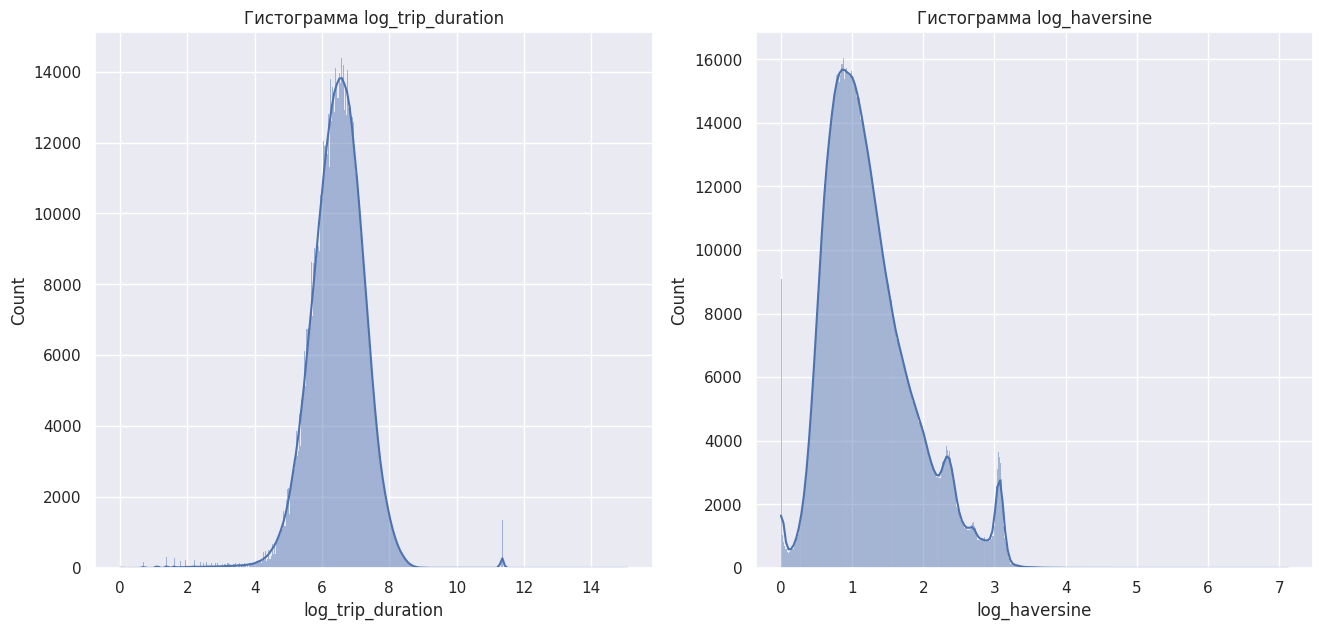

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

features = ['log_trip_duration', 'log_haversine']

#Гистограммы
plt.figure(figsize=(20, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Гистограмма {feature}')

plt.tight_layout()
plt.show()

In [ ]:
#IQR
def remove_outliers(df):
    numeric_features = ['log_haversine', 'log_trip_duration']
    for feature in numeric_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        df = df[(df[feature] >= Q1 - 1.5 * IQR) & (df[feature] <= Q3 + 1.5 * IQR)]

    return df

df_clean = remove_outliers(df)

df_clean.head()

id     pickup_datetime  pickup_longitude  pickup_latitude  \
0  id2875421 2016-03-14 17:24:55        -73.982155        40.767937   
1  id2377394 2016-06-12 00:43:35        -73.980415        40.738564   
2  id3858529 2016-01-19 11:35:24        -73.979027        40.763939   
3  id3504673 2016-04-06 19:32:31        -74.010040        40.719971   
4  id2181028 2016-03-26 13:30:55        -73.973053        40.793209   

   dropoff_longitude  dropoff_latitude  trip_duration  day_of_year  \
0         -73.964630         40.765602            455           74   
1         -73.999481         40.731152            663          164   
2         -74.005333         40.710087           2124           19   
3         -74.012268         40.706718            429           97   
4         -73.972923         40.782520            435           86   

   day_of_week  hour  month  is_peak_hour  is_accident  haversine  \
0            0    17      3          True        False   1.498521   
1            6     0      6         False        False   1.805507   
2            1    11      1         False        False   6.385098   
3            2    19      4          True        False   1.485498   
4            5    13      3         False        False   1.188588   

   log_haversine  log_trip_duration  
0       0.915699           6.120297  
1       1.031584           6.496775  
2       1.999464           7.661056  
3       0.910473           6.061457  
4       0.783257           6.075346

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

threshold = 0.01

categorical_features = ['day_of_week', 'hour', 'month', 'day_of_year', 'is_peak_hour', 'is_accident']

for feature in categorical_features:
    frequencies = df_clean[feature].value_counts(normalize=True)

    rare_categories = frequencies[frequencies < threshold].index

    df_clean[feature] = df_clean[feature].apply(lambda x: "rare" if x in rare_categories else x)

df_clean.head()

id     pickup_datetime  pickup_longitude  pickup_latitude  \
0  id2875421 2016-03-14 17:24:55        -73.982155        40.767937   
1  id2377394 2016-06-12 00:43:35        -73.980415        40.738564   
2  id3858529 2016-01-19 11:35:24        -73.979027        40.763939   
3  id3504673 2016-04-06 19:32:31        -74.010040        40.719971   
4  id2181028 2016-03-26 13:30:55        -73.973053        40.793209   

   dropoff_longitude  dropoff_latitude  trip_duration day_of_year  \
0         -73.964630         40.765602            455        rare   
1         -73.999481         40.731152            663        rare   
2         -74.005333         40.710087           2124        rare   
3         -74.012268         40.706718            429        rare   
4         -73.972923         40.782520            435        rare   

   day_of_week hour  month  is_peak_hour  is_accident  haversine  \
0            0   17      3          True        False   1.498521   
1            6    0      6         False        False   1.805507   
2            1   11      1         False        False   6.385098   
3            2   19      4          True        False   1.485498   
4            5   13      3         False        False   1.188588   

   log_haversine  log_trip_duration  
0       0.915699           6.120297  
1       1.031584           6.496775  
2       1.999464           7.661056  
3       0.910473           6.061457  
4       0.783257           6.075346

Обучите регрессию `Ridge` с использованием параметров по умолчанию, применив `OneHotEncoder` для кодирования всех категориальных признаков и `StandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы сделали до этой части задания. Замерьте качество на тестовой выборке (RMSLE)

In [ ]:
features = ['day_of_week', 'hour', 'month', 'day_of_year', 'is_peak_hour', 'is_accident', 'log_haversine']
target = 'log_trip_duration'

X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

categorical_features = ['day_of_week', 'hour', 'month', 'day_of_year', 'is_peak_hour', 'is_accident']
numeric_features = ['log_haversine']

df_clean[categorical_features] = df_clean[categorical_features].map(str)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)

y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

rmsle_score = np.sqrt(mean_squared_log_error(y_test_actual, y_pred))
print(f'RMSLE на тестовой выборке: {rmsle_score:.4f}')

RMSLE на тестовой выборке: 0.4203


**Задание 13 [+0.5 балла]**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

num_features_before = X.shape[1]
print(f"Количество признаков до OneHot: {num_features_before}")

X_encoded = preprocessor.fit_transform(X)

num_features_after = X_encoded.shape[1]
print(f"Количество признаков после OneHot: {num_features_after}")

Количество признаков до OneHot: 7
Количество признаков после OneHot: 43


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

from sklearn.linear_model import Lasso

pipeline_lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

pipeline_lasso.fit(X_train, y_train)
y_pred_lasso = pipeline_lasso.predict(X_test)
rmsle_lasso = np.sqrt(mean_squared_log_error(y_test, y_pred_lasso))

print(f"RMSLE на тестовой выборке для Lasso: {rmsle_lasso}")
print(f"RMSLE на тестовой выборке для Ridge: {rmsle_score:.4f}")

RMSLE на тестовой выборке для Lasso: 0.09305863847590103
RMSLE на тестовой выборке для Ridge: 0.4203


Lasso показывает себя хуже, чем Ridge

По тренировочной выборке с помощью кросс-валидации (`zGridSearchCV`) подберите оптимальные значения параметра регуляризации (alpha, lambda в разных литературах по-разному) для `Ridge` и `Lasso` на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

from sklearn.model_selection import GridSearchCV

features = ['day_of_week', 'hour', 'month', 'day_of_year', 'is_peak_hour', 'is_accident', 'log_haversine']
target = 'log_trip_duration'

X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['day_of_week', 'hour', 'month', 'day_of_year', 'is_peak_hour', 'is_accident']
numeric_features = ['log_haversine']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

param_grid = {'regressor__alpha': [0.01, 0.1, 1, 10, 100, 1000]}

#Ridge
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

grid_search_ridge = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_log_error')
grid_search_ridge.fit(X_train, y_train)

best_ridge_alpha = grid_search_ridge.best_params_['regressor__alpha']
best_ridge_rmsle = np.sqrt(-grid_search_ridge.best_score_)

print(f"Оптимальное значение alpha для Ridge: {best_ridge_alpha}")
print(f"Лучшее значение RMSLE для Ridge (CV): {best_ridge_rmsle}")

#Lasso
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

grid_search_lasso = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring='neg_mean_squared_log_error')
grid_search_lasso.fit(X_train, y_train)

best_lasso_alpha = grid_search_lasso.best_params_['regressor__alpha']
best_lasso_rmsle = np.sqrt(-grid_search_lasso.best_score_)

print(f"Оптимальное значение alpha для Lasso: {best_lasso_alpha}")
print(f"Лучшее значение RMSLE для Lasso (CV): {best_lasso_rmsle}")

Оптимальное значение alpha для Ridge: 10
Лучшее значение RMSLE для Ridge (CV): 0.058206943900534706
Оптимальное значение alpha для Lasso: 0.01
Лучшее значение RMSLE для Lasso (CV): 0.06166849760169404


<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 14 [+0.5 балла]**. Использование взаимодействия признаков часто оказывается полезным для улучшения качества модели. Мы уже разделили карту Манхэттена на ячейки и создали признаки, указывающие на ячейку начала и окончания поездки.

Теперь предлагается пойти дальше и посчитать, как часто встречается каждая возможная пара этих признаков в нашем наборе данных. Затем выберем 100 самых частых пар и закодируем поездки с этими парами как категориальный признак, а для остальных объектов установим значение -1. Таким образом, мы сможем кодировать информацию о маршруте поездки такси.

Создание таких признаков может быть круто по нескольким причинам:

1. **Улучшение предсказаний**: Комбинация начальной и конечной точек поездки может содержать важную информацию о времени поездки, которая поможет улучшить предсказательную способность модели.

2. **Выявление популярных маршрутов**: Анализ самых частых пар ячеек может помочь выявить наиболее популярные маршруты, что может быть полезно для планирования транспортных услуг.

3. **Интерпретируемость**: Новые признаки, основанные на маршрутах, могут улучшить интерпретируемость модели, позволяя лучше понять, как различные маршруты влияют на время поездки.

4. **Адаптация к специфике данных**: Такой подход позволяет адаптировать модель к специфике данных о поездках такси, учитывая географическую структуру города и особенности движения.

Также вы можете придумать другие способы создания признаков, связанных с маршрутом, которые могут дать дополнительные баллы при сдаче этого домашнего задания


In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(df_clean, df_clean['log_trip_duration'], test_size=0.2, random_state=42)

X_train[['pickup_cell', 'dropoff_cell']] = transformer.fit_transform(X_train[['pickup_latitude', 'pickup_longitude']].values)
X_test[['pickup_cell', 'dropoff_cell']] = transformer.transform(X_test[['pickup_latitude', 'pickup_longitude']].values)

print(X_train.head())
print(X_test.head())


X_train['route'] = list(zip(X_train['pickup_cell'], X_train['dropoff_cell']))
X_test['route'] = list(zip(X_test['pickup_cell'], X_test['dropoff_cell']))

route_counts = Counter(X_train['route'])
top100_routes = {route for route, _ in route_counts.most_common(100)}

X_train['route_encoded'] = X_train['route'].apply(lambda x: x if x in top100_routes else -1)
X_test['route_encoded'] = X_test['route'].apply(lambda x: x if x in top100_routes else -1)

X_train.drop(columns=['route'], inplace=True)
X_test.drop(columns=['route'], inplace=True)

                id     pickup_datetime  pickup_longitude  pickup_latitude  \
1234690  id1031313 2016-05-07 21:55:25        -74.008102        40.738693   
1300962  id3658008 2016-05-17 21:07:07        -73.997063        40.737038   
409030   id0192786 2016-03-18 00:47:39        -73.952538        40.726967   
357950   id0194234 2016-04-11 13:40:18        -73.964951        40.759602   
873707   id2605241 2016-04-26 17:15:26        -73.973068        40.752331   

         dropoff_longitude  dropoff_latitude  trip_duration  day_of_year  \
1234690         -74.001511         40.731956            380          128   
1300962         -73.982697         40.760357           1400          138   
409030          -73.921715         40.705387            718           78   
357950          -73.981857         40.746670            722          102   
873707          -73.964226         40.756214            556          117   

         day_of_week  hour  month  is_peak_hour  is_accident  haversine  \
12346

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

Этот признак даёт модели информацию о частотных закономерностях маршрутов, что полезно, так как модель считает все значения незавимыми.

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Мы самостоятельно задаём для модели наиболее частые и важные маршруты. Сама модель является при этом линейной зависимостью, то есть линейная модель не способна самостоятельно учесть взаимосвязь между ячейками, а только найти зависимость между значениями (считающимися ею независимыми) и таргетом. Она не будет учитывать часто встречающиеся пары значений, которые могли бы влиять на таргет.
Также этот признак может быть полезным по той причине, что он позволяет избавиться от «шумных» данных, которые бы вызвали переобучение.

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

features = ['day_of_week', 'hour', 'month', 'day_of_year', 'is_peak_hour', 'is_accident', 'log_haversine', 'route_encoded']
target = 'log_trip_duration'

categorical_features = ['day_of_week', 'hour', 'month', 'day_of_year', 'is_peak_hour', 'is_accident', 'route_encoded']
numeric_features = ['log_haversine']

for feature in categorical_features:
    X_train[feature] = X_train[feature].astype(str)
    X_test[feature] = X_test[feature].astype(str)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

best_alpha = 10

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=best_alpha))
])

model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)

y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

rmsle_score = np.sqrt(mean_squared_log_error(y_test_actual, y_pred))
print(f'RMSLE на тестовой выборке: {rmsle_score:.4f}')

RMSLE на тестовой выборке: 0.4090


RMSLE стал меньше с 0.58 до 0.4